# Quickstart: MDP Off-Policy Evaluation

We evaluate a target policy on a finite-horizon synthetic MDP and compare
multiple estimators. Figures are rendered inline and exported for docs.

In [1]:
from __future__ import annotations

from pathlib import Path

import numpy as np

from crl.benchmarks.mdp_synth import SyntheticMDP, SyntheticMDPConfig
from crl.ope import evaluate
from crl.viz import configure_notebook_display, save_figure

In [2]:
np.random.seed(0)
configure_notebook_display()

benchmark = SyntheticMDP(SyntheticMDPConfig(seed=0, horizon=5))
dataset = benchmark.sample(num_trajectories=300, seed=1)
true_value = benchmark.true_policy_value(benchmark.target_policy)

report = evaluate(
    dataset=dataset,
    policy=benchmark.target_policy,
    estimators=["is", "wis", "pdis", "dr", "wdr", "mrdr", "fqe"],
)

summary = report.summary_table()
summary

,value,stderr,ci,diagnostics,warnings,metadata,estimator
0,-1.756648,2.422559,"(-6.504863064367492, 2.9915663121687848)",{'overlap': {'min_behavior_prob': 0.0140824109...,[Effective sample size ratio below threshold; ...,"{'estimator': 'IS', 'num_trajectories': 300}",IS
1,-0.037882,0.221707,"(-0.4724285634777455, 0.39666367931851504)",{'overlap': {'min_behavior_prob': 0.0140824109...,[Effective sample size ratio below threshold; ...,"{'estimator': 'WIS', 'num_trajectories': 300}",WIS
2,35.873354,34.431090,"(-31.6115836743785, 103.35829072323818)",{'overlap': {'min_behavior_prob': 0.0140824109...,[Effective sample size ratio below threshold; ...,"{'estimator': 'PDIS', 'num_trajectories': 300}",PDIS
3,-27.435803,29.298625,"(-84.86110732292346, 29.989502117145012)",{'overlap': {'min_behavior_prob': 0.0140824109...,[Effective sample size ratio below threshold; ...,"{'estimator': 'DR', 'config': {'num_folds': 2,...",DR
4,0.010429,0.003393,"(0.0037791695565394384, 0.01707845178732889)",{'overlap': {'min_behavior_prob': 0.0140824109...,[Effective sample size ratio below threshold; ...,"{'estimator': 'WDR', 'config': {'num_folds': 2...",WDR
5,-27.456248,29.319129,"(-84.92174087580048, 30.009245727295394)",{'overlap': {'min_behavior_prob': 0.0140824109...,[Effective sample size ratio below threshold; ...,"{'estimator': 'MRDR', 'config': {'num_folds': ...",MRDR
6,1.556061,0.027263,"(1.502626293110945, 1.6094957353085522)",{'overlap': {'min_behavior_prob': 0.0140824109...,[Effective sample size ratio below threshold; ...,"{'estimator': 'FQE', 'config': {'hidden_sizes'...",FQE


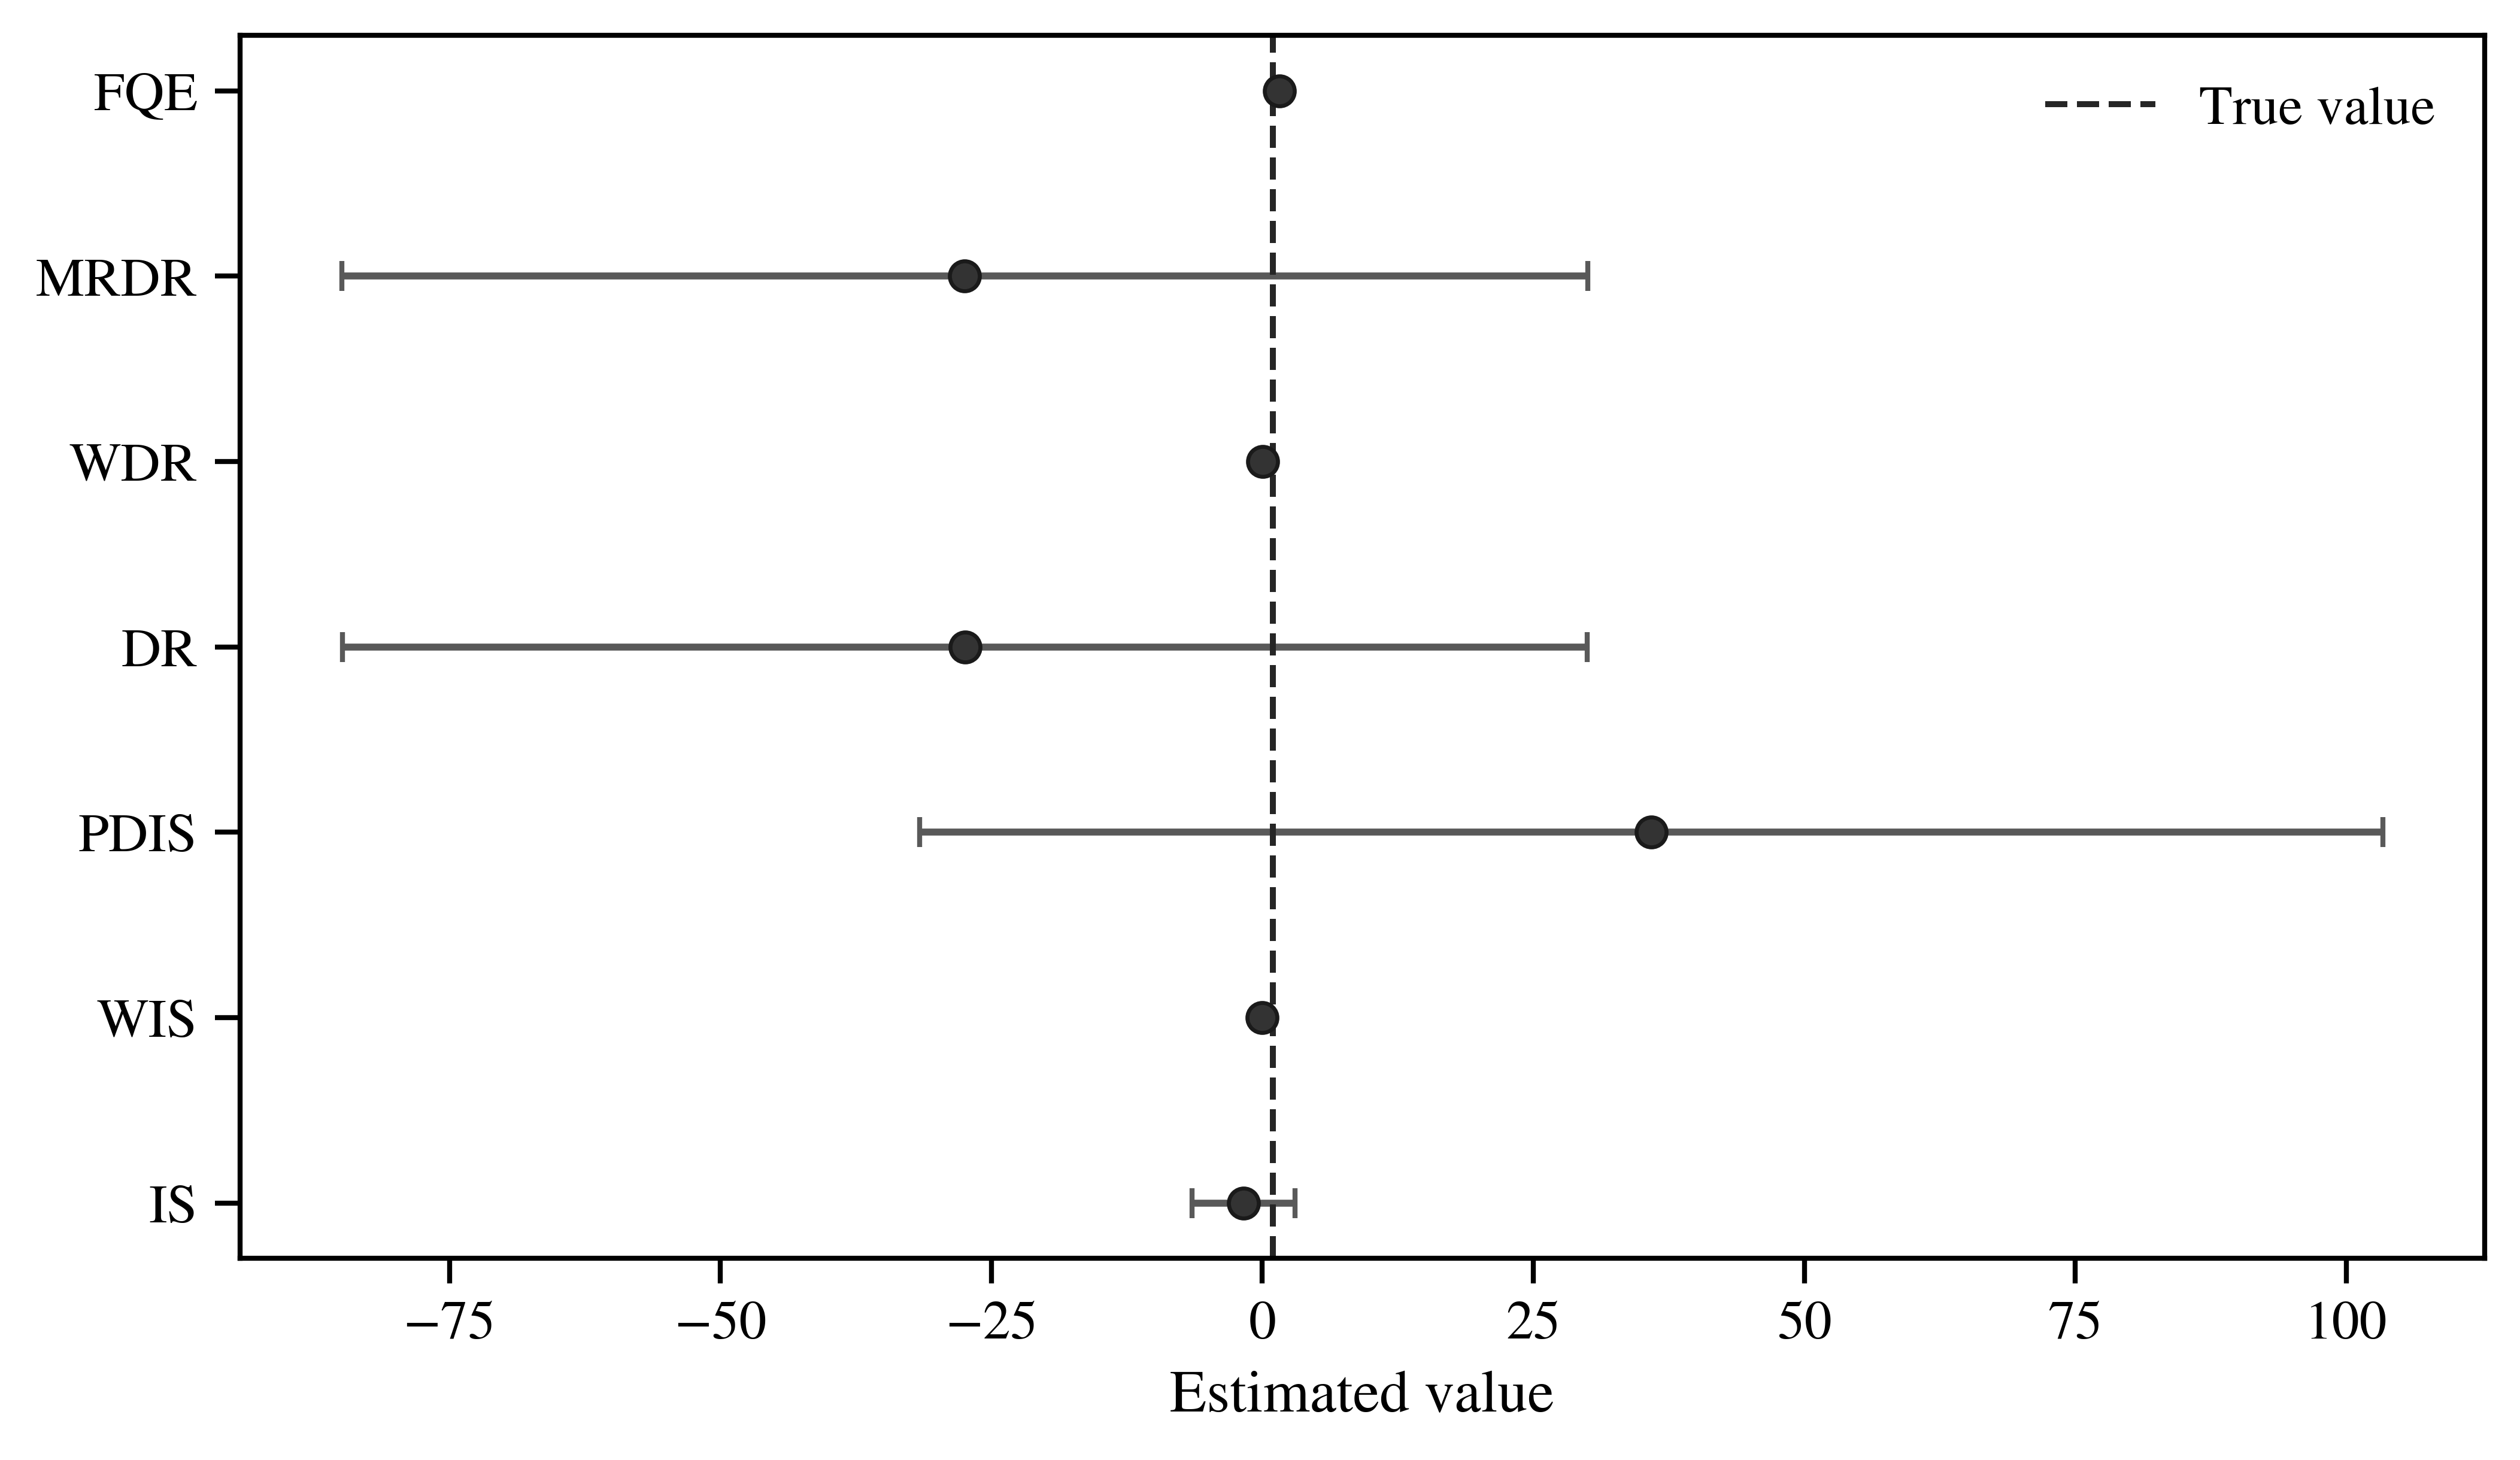

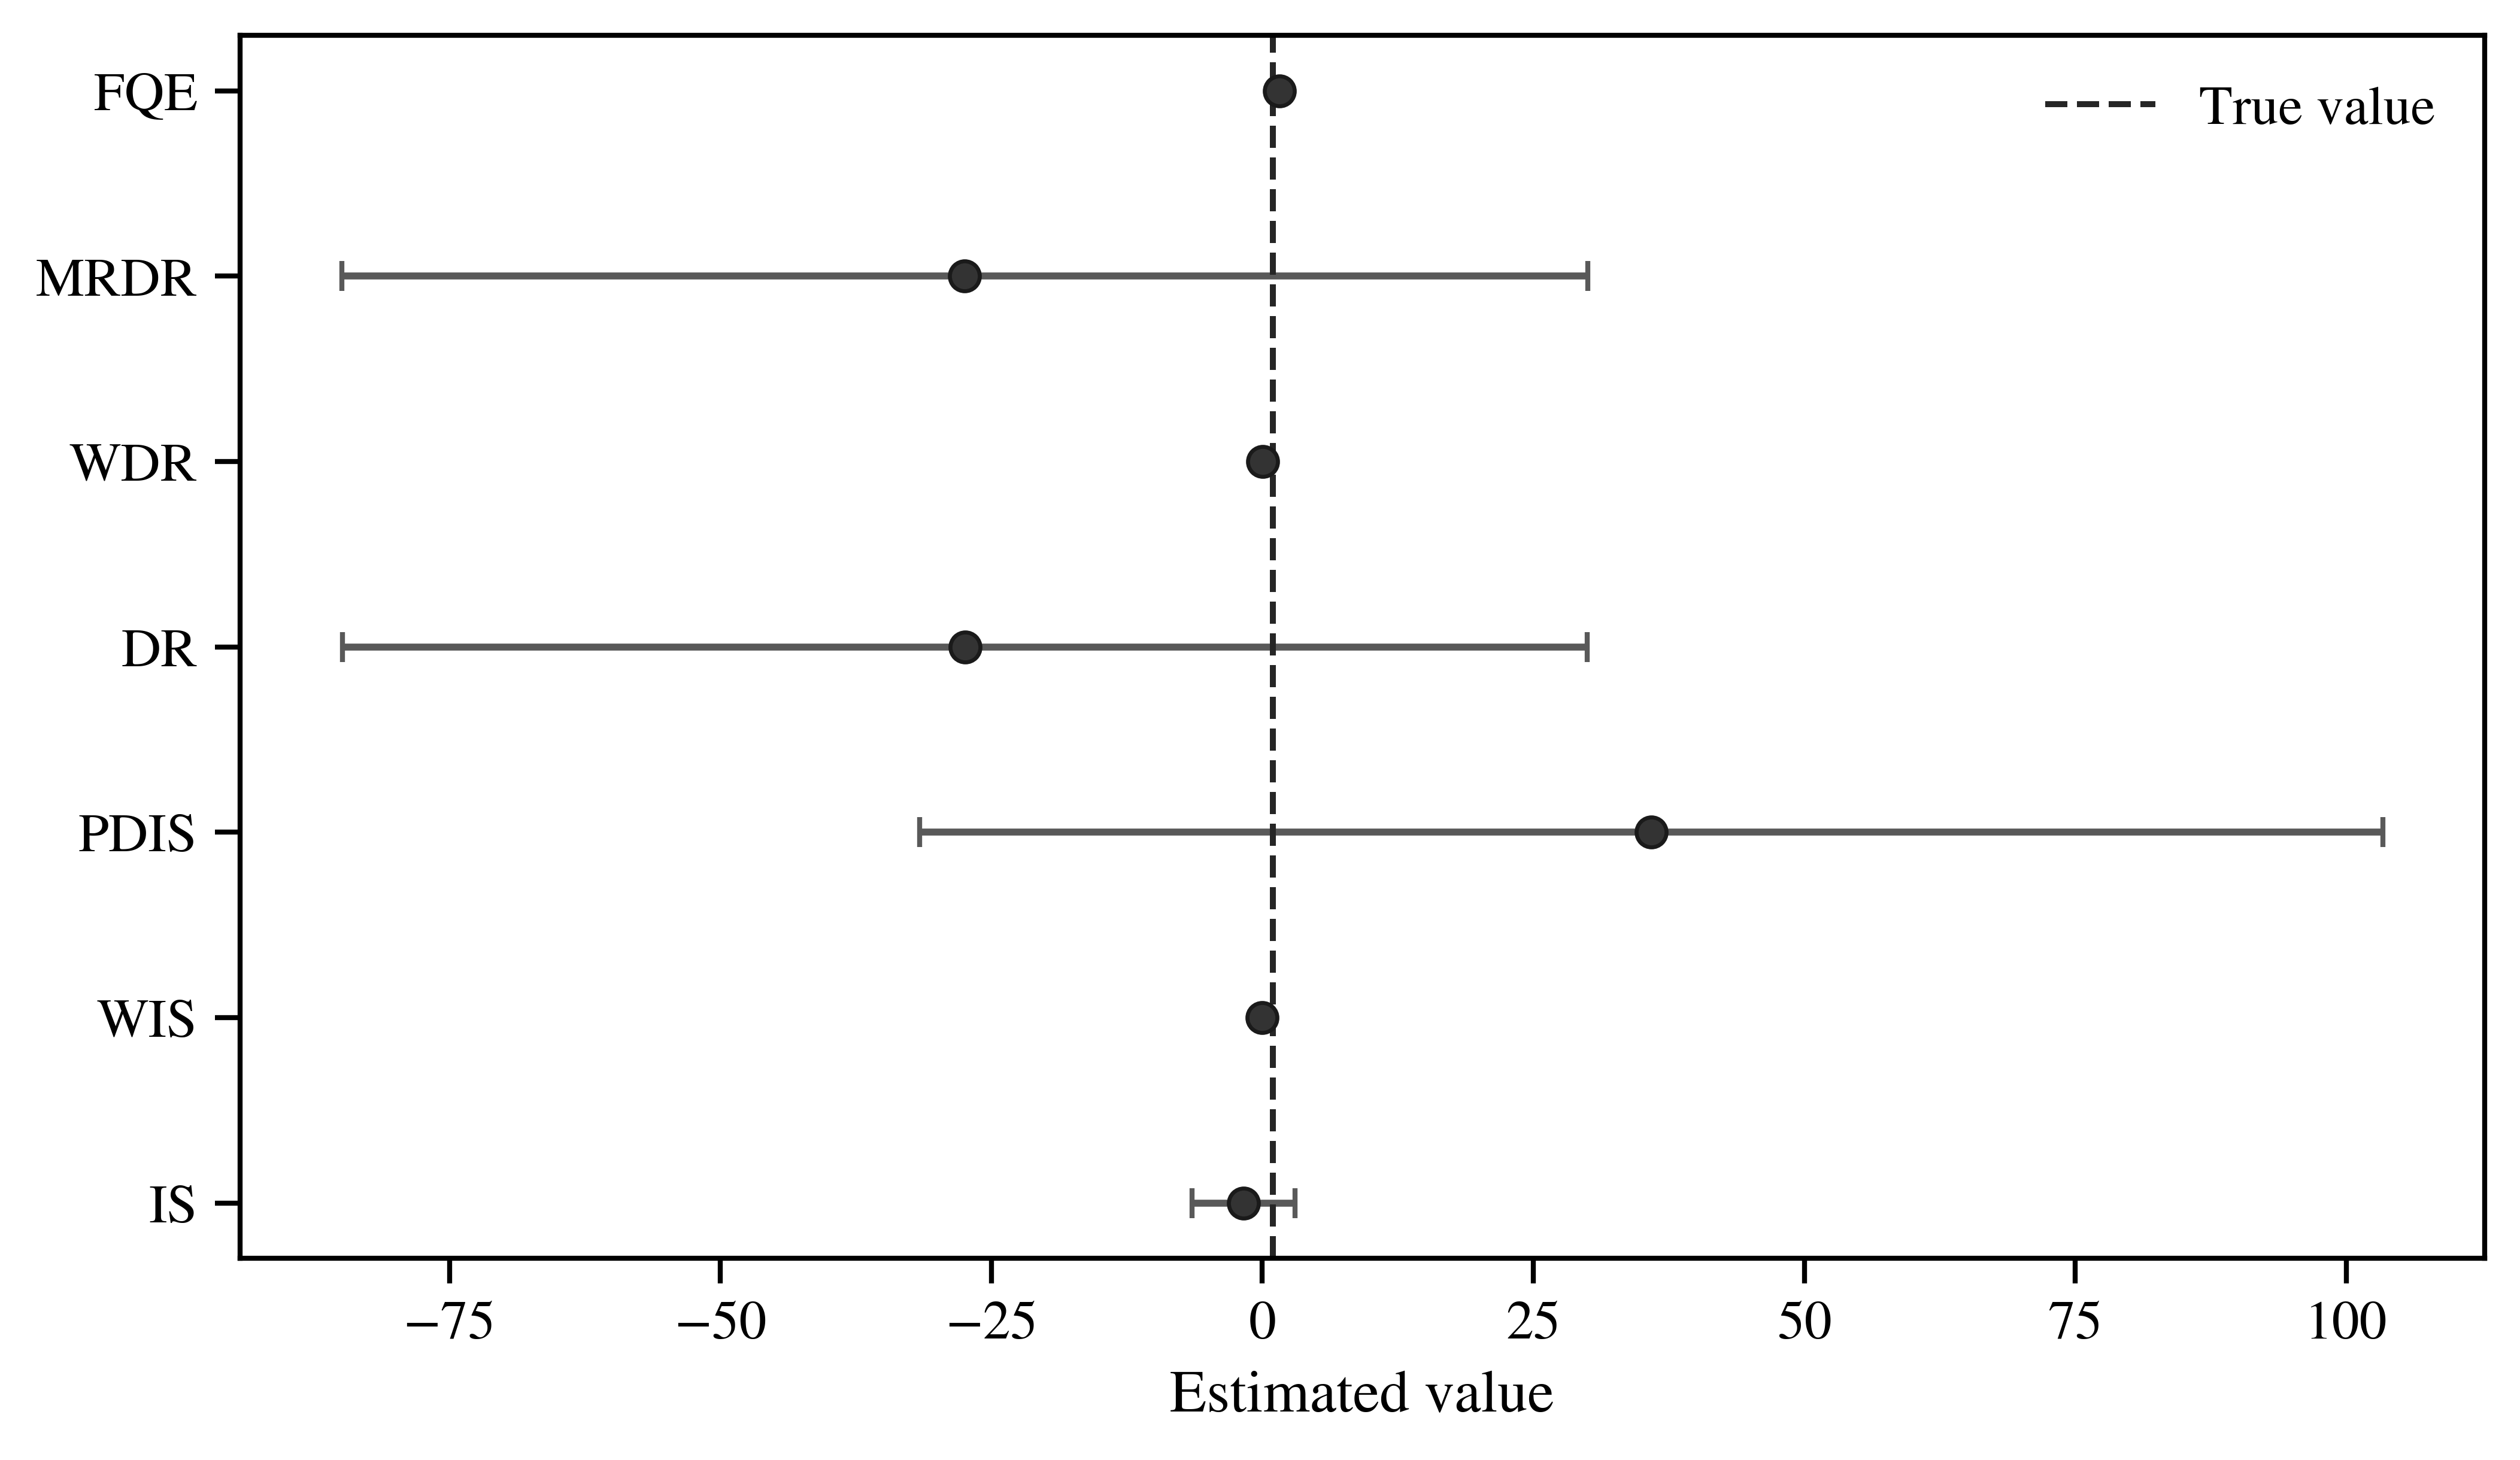

In [3]:
fig = report.plot_estimator_comparison(truth=true_value)
fig

In [4]:
output_dir = Path("docs/assets/figures")
output_dir.mkdir(parents=True, exist_ok=True)
save_figure(fig, output_dir / "quickstart_mdp_estimator_comparison")

{'pdf': 'docs/assets/figures/quickstart_mdp_estimator_comparison.pdf',
 'png': 'docs/assets/figures/quickstart_mdp_estimator_comparison.png'}